In [1]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

2024-05-17 01:19:26.170082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 01:19:28.451429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [3]:
data_dir = '/teamspace/studios/this_studio/Augmented Data'

image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.jpeg')]
labels = [0 if 'Benign' in file else 1 for file in image_files]

In [4]:
data = pd.DataFrame({'filename': image_files, 'class': labels})

train_data, test_val_data = train_test_split(data, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(test_val_data, test_size=0.5, random_state=42)

In [5]:
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Rescale to [0, 1]
    return img

def extract_features(img_paths):
    features_list = []
    for img_path in img_paths:
        img = preprocess_image(img_path)
        features = base_model.predict(img)
        features = features.flatten()  # Flatten the features
        features_list.append(features)
    return np.array(features_list)

In [6]:
X_train = extract_features(train_data['filename'])
y_train = train_data['class']

X_val = extract_features(val_data['filename'])
y_val = val_data['class']

X_test = extract_features(test_data['filename'])
y_test = test_data['class']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [8]:
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Accuracy:", val_accuracy)

Validation Set Accuracy: 0.7961564859299931


In [9]:
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.7873799725651578


In [12]:
from sklearn.metrics import recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, matthews_corrcoef, confusion_matrix
# Metrics for Random Forest
rf_metrics = {
    "Recall": recall_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred),
    "MSE": mean_squared_error(y_test, y_test_pred),
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "MCC": matthews_corrcoef(y_test, y_test_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_test_pred)
}

for metric, value in rf_metrics.items():
    print(f"Random Forest {metric}: {value}")

Random Forest Recall: 0.9006410256410257
Random Forest Precision: 0.7952830188679245
Random Forest F1 Score: 0.8446893787575152
Random Forest MSE: 0.21262002743484226
Random Forest MAE: 0.21262002743484226
Random Forest MCC: 0.5218668876848462
Random Forest Confusion Matrix: [[305 217]
 [ 93 843]]


In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a voting classifier combining the individual classifiers
ensemble_classifier = VotingClassifier(estimators=[('Random Forest', rf_classifier)], voting='soft')

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Predictions on validation set
y_val_pred = ensemble_classifier.predict(X_val)

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Accuracy (Ensemble):", val_accuracy)

# Predictions on test set
y_test_pred = ensemble_classifier.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy (Ensemble):", test_accuracy)


Validation Set Accuracy (Ensemble): 0.7961564859299931
Test Set Accuracy (Ensemble): 0.7873799725651578


In [15]:
ensemble_metrics = {
    "Recall": recall_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred),
    "MSE": mean_squared_error(y_test, y_test_pred),
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "MCC": matthews_corrcoef(y_test, y_test_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_test_pred)
}

for metric, value in ensemble_metrics.items():
    print(f"Ensemble {metric}: {value}")


Ensemble Recall: 0.9006410256410257
Ensemble Precision: 0.7952830188679245
Ensemble F1 Score: 0.8446893787575152
Ensemble MSE: 0.21262002743484226
Ensemble MAE: 0.21262002743484226
Ensemble MCC: 0.5218668876848462
Ensemble Confusion Matrix: [[305 217]
 [ 93 843]]


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
import xgboost as xgb

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {'objective': 'binary:logistic', 'eval_metric': 'error'}

# Train the XGBoost model
xgb_classifier = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'validation')])

# Predictions on validation set
y_val_pred = xgb_classifier.predict(dval)
y_val_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_val_pred]

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
print("Validation Set Accuracy (XGBoost):", val_accuracy)

# Predictions on test set
y_test_pred = xgb_classifier.predict(dtest)
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print("Test Set Accuracy (XGBoost):", test_accuracy)


[0]	validation-error:0.35690
[1]	validation-error:0.29581
[2]	validation-error:0.26493
[3]	validation-error:0.24914
[4]	validation-error:0.24846
[5]	validation-error:0.24091
[6]	validation-error:0.24777
[7]	validation-error:0.23953
[8]	validation-error:0.23130
[9]	validation-error:0.23061
[10]	validation-error:0.22992
[11]	validation-error:0.21826
[12]	validation-error:0.22237
[13]	validation-error:0.21551
[14]	validation-error:0.21826
[15]	validation-error:0.21757
[16]	validation-error:0.20865
[17]	validation-error:0.20659
[18]	validation-error:0.20590
[19]	validation-error:0.20041
[20]	validation-error:0.19767
[21]	validation-error:0.20178
[22]	validation-error:0.19629
[23]	validation-error:0.20041
[24]	validation-error:0.19561
[25]	validation-error:0.19355
[26]	validation-error:0.19355
[27]	validation-error:0.19355
[28]	validation-error:0.19698
[29]	validation-error:0.18806
[30]	validation-error:0.18874
[31]	validation-error:0.18737
[32]	validation-error:0.18806
[33]	validation-erro

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_test_pred_binary)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_test_pred_binary)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_test_pred_binary)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_test_pred_binary)
print("F1-score:", f1)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC:", roc_auc)

# Compute Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_test_pred_binary)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8532235939643347
Precision: 0.8744813278008299
Recall: 0.9006410256410257
F1-score: 0.8873684210526316
ROC AUC: 0.9274179683662442
Matthews Correlation Coefficient (MCC): 0.6774754951960417
Confusion Matrix:
[[401 121]
 [ 93 843]]


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mcc = matthews_corrcoef(y_test, y_test_pred_binary)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)

Matthews Correlation Coefficient (MCC): 0.6774754951960417
Mean Squared Error (MSE): 0.10683297093847365
Mean Absolute Error (MAE): 0.18281896971046366


Matplotlib created a temporary cache directory at /tmp/matplotlib-fhj05g85 because the default path (/teamspace/studios/this_studio/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


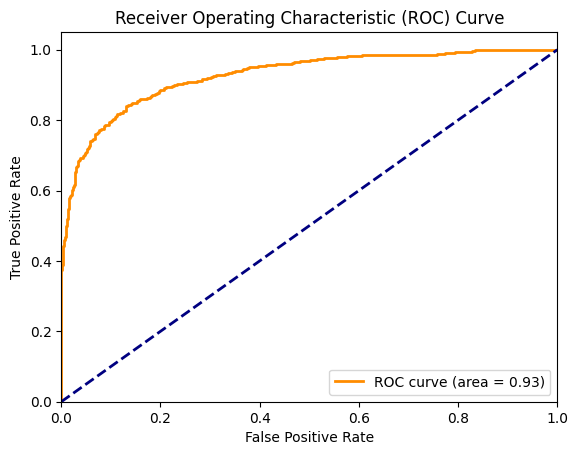

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


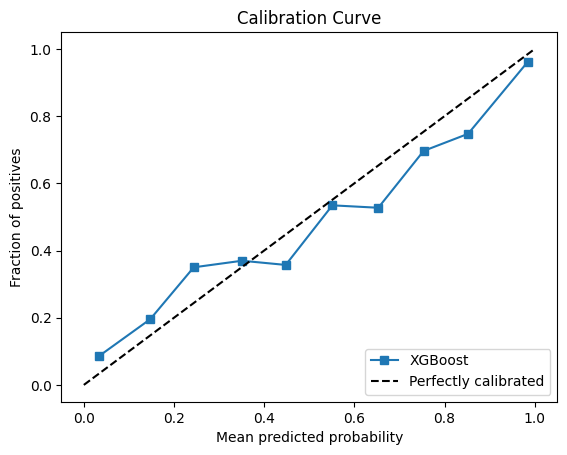

In [21]:
from sklearn.calibration import calibration_curve
# 3. Calibration Curve
plt.figure()
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_pred, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc='lower right')

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Confusion Matrix')

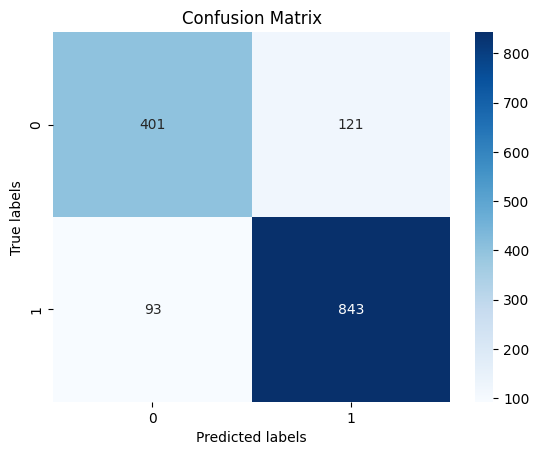

In [23]:
import seaborn as sns  # Add this import statement

# 2. Confusion Matrix Heatmap
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')


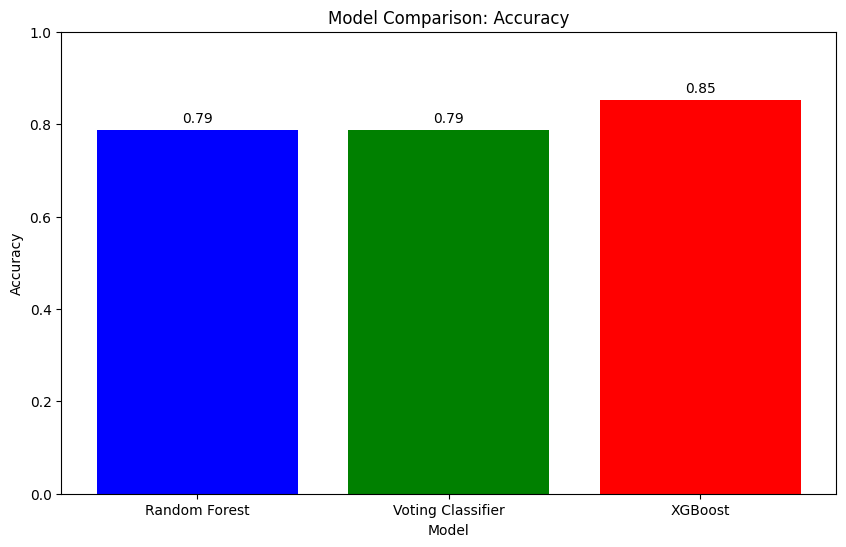

In [24]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined

# Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_test_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Voting Classifier
voting_classifier = VotingClassifier(estimators=[('Random Forest', rf_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)
y_test_pred_voting = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_test_pred_voting)

# XGBoost Model
xgb_classifier = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_test_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_test_pred_xgb)

# Plotting the accuracies
models = ['Random Forest', 'Voting Classifier', 'XGBoost']
accuracies = [rf_accuracy, voting_accuracy, xgb_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

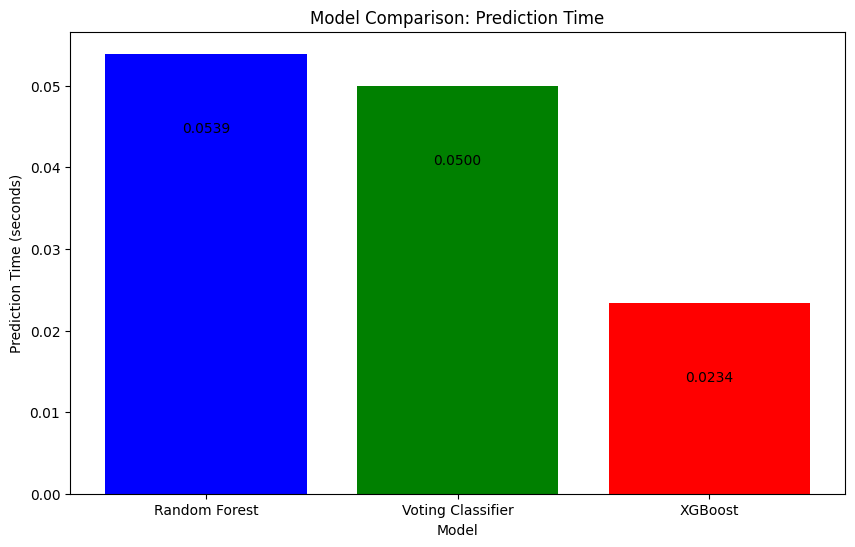

In [29]:
import time

# Prediction time comparison
rf_pred_time = time.time()
rf_classifier.predict(X_test)
rf_pred_time = time.time() - rf_pred_time

voting_pred_time = time.time()
voting_classifier.predict(X_test)
voting_pred_time = time.time() - voting_pred_time

xgb_pred_time = time.time()
xgb_classifier.predict(X_test)
xgb_pred_time = time.time() - xgb_pred_time

models = ['Random Forest', 'Voting Classifier', 'XGBoost']
pred_times = [rf_pred_time, voting_pred_time, xgb_pred_time]

plt.figure(figsize=(10, 6))
plt.bar(models, pred_times, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Prediction Time (seconds)')
plt.title('Model Comparison: Prediction Time')
for i, v in enumerate(pred_times):
    plt.text(i, v - 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

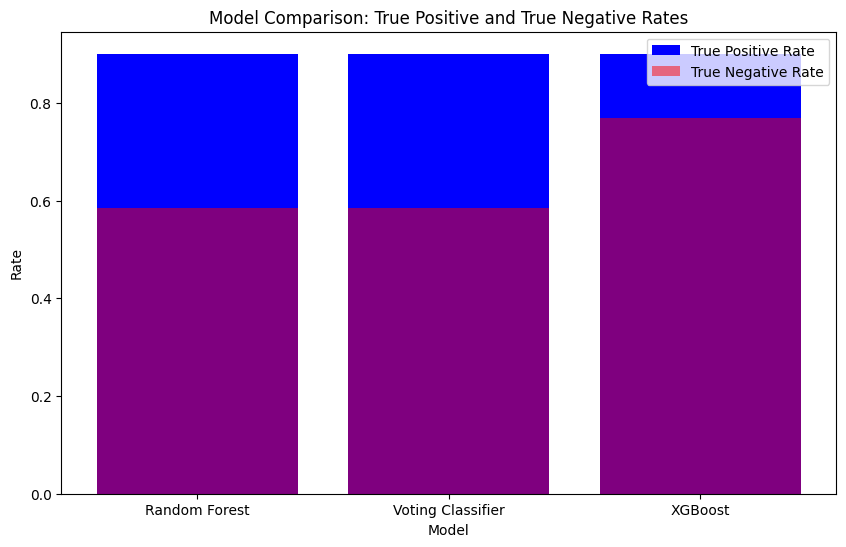

In [31]:
# True Positive and True Negative Rates comparison
rf_tp = confusion_matrix(y_test, y_test_pred_rf)[1, 1] / sum(confusion_matrix(y_test, y_test_pred_rf)[1])
rf_tn = confusion_matrix(y_test, y_test_pred_rf)[0, 0] / sum(confusion_matrix(y_test, y_test_pred_rf)[0])

voting_tp = confusion_matrix(y_test, y_test_pred_voting)[1, 1] / sum(confusion_matrix(y_test, y_test_pred_voting)[1])
voting_tn = confusion_matrix(y_test, y_test_pred_voting)[0, 0] / sum(confusion_matrix(y_test, y_test_pred_voting)[0])

xgb_tp = confusion_matrix(y_test, y_test_pred_xgb)[1, 1] / sum(confusion_matrix(y_test, y_test_pred_xgb)[1])
xgb_tn = confusion_matrix(y_test, y_test_pred_xgb)[0, 0] / sum(confusion_matrix(y_test, y_test_pred_xgb)[0])

models = ['Random Forest', 'Voting Classifier', 'XGBoost']
tp_rates = [rf_tp, voting_tp, xgb_tp]
tn_rates = [rf_tn, voting_tn, xgb_tn]

plt.figure(figsize=(10, 6))
plt.bar(models, tp_rates, color='blue', label='True Positive Rate')
plt.bar(models, tn_rates, color='red', label='True Negative Rate', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Rate')
plt.title('Model Comparison: True Positive and True Negative Rates')
plt.legend()
plt.show()

In [33]:
pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 21.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [17]:
from PIL import Image
import numpy as np

# Function to load and preprocess the image from the specified file path
def load_image(file_path):
    img = Image.open(file_path)
    img = img.resize((64, 64))  # Resize the image to match the input size of the model (64x64)
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img

# Provide the file path of the image
file_path = '/teamspace/studios/this_studio/Augmented Data/aug_Malignant_0_9573.jpeg'  # Replace with the actual file path of your image

# Load and preprocess the image
img = load_image(file_path)

# Flatten the image
img_flat = img.flatten()

# Ensure that the flattened image has the correct number of features (64*64*3 = 12288)
expected_features = 64 * 64 * 3
assert len(img_flat) == expected_features, f"Number of features ({len(img_flat)}) does not match the expected dimensions ({expected_features})"

# Reshape the image to have 8192 features
img_flat = img_flat[:8192]  # Take the first 8192 features

# Perform prediction using the trained Random Forest model
prediction = rf_classifier.predict(img_flat.reshape(1, -1))

# Display the classification result
print("Prediction:", 'Benign' if prediction == 0 else 'Malignant')

Prediction: Malignant


In [18]:
from PIL import Image
import numpy as np

# Function to load and preprocess the image from the specified file path
def load_image(file_path):
    img = Image.open(file_path)
    img = img.resize((64, 64))  # Resize the image to match the input size of the model (64x64)
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img

# Provide the file path of the image
file_path = '/teamspace/studios/this_studio/Augmented Data/aug_Benign_0_9981.jpeg'  # Replace with the actual file path of your image

# Load and preprocess the image
img = load_image(file_path)

# Flatten the image
img_flat = img.flatten()

# Ensure that the flattened image has the correct number of features (64*64*3 = 12288)
expected_features = 64 * 64 * 3
assert len(img_flat) == expected_features, f"Number of features ({len(img_flat)}) does not match the expected dimensions ({expected_features})"

# Reshape the image to have 8192 features
img_flat = img_flat[:8192]  # Take the first 8192 features

# Perform prediction using the trained Random Forest model
prediction = rf_classifier.predict(img_flat.reshape(1, -1))

# Display the classification result
print("Prediction:", 'Benign' if prediction == 0 else 'Malignant')

Prediction: Benign
